In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)

print("Keras version:", keras.__version__)


TensorFlow version: 2.15.0
Keras version: 2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [ ]:
print("Bacterial : ", len(os.listdir("/content/drive/My Drive/Capstone/dataset/New_Augmnt/Bacterial")))
print("Downy Mildew: ", len(os.listdir("/content/drive/My Drive/Capstone/dataset/New_Augmnt/Downy Mildew")))
print("Powdery Mildew: ", len(os.listdir("/content/drive/My Drive/Capstone/dataset/New_Augmnt/Powdery Mildew")))
print("Septoria Blight: ", len(os.listdir("/content/drive/My Drive/Capstone/dataset/New_Augmnt/Septoria Blight")))
print("Healthy: ", len(os.listdir("/content/drive/My Drive/Capstone/dataset/New_Augmnt/Healthy")))
print("Viral: ", len(os.listdir("/content/drive/My Drive/Capstone/dataset/New_Augmnt/Viral")))
print("Wilt and leaf blight: ", len(os.listdir("/content/drive/My Drive/Capstone/dataset/New_Augmnt/Wilt and leaf blight")))
print("Undefine: ", len(os.listdir("/content/drive/My Drive/Capstone/dataset/New_Augmnt/Undefine")))

Bacterial :  184
Downy Mildew:  184
Powdery Mildew:  179
Septoria Blight:  184
Healthy:  188
Viral:  185
Wilt and leaf blight:  184
Undefine:  184


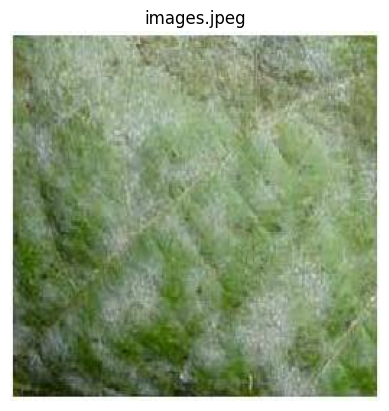

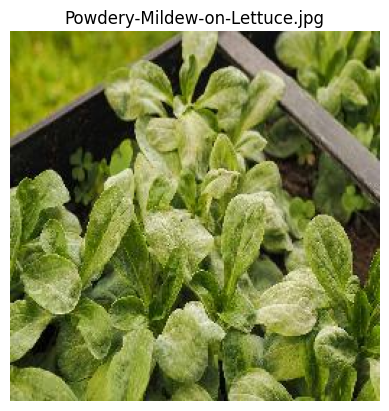

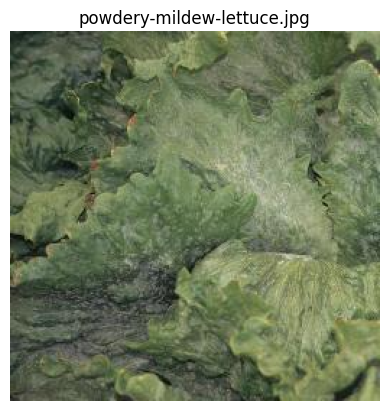

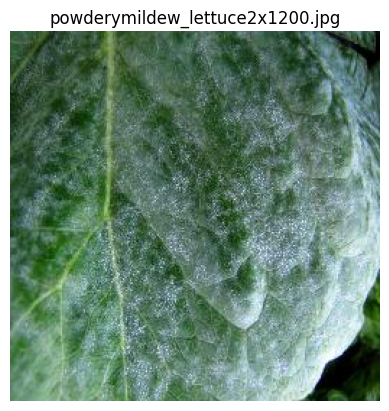

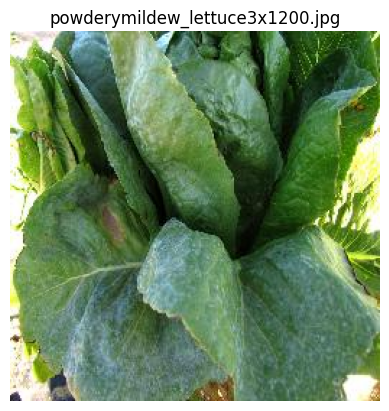

In [ ]:
# Specify the directory containing the images
image_dir = '/content/drive/My Drive/Capstone/dataset/New_Augmnt/Powdery Mildew'

# Get a list of files in the directory
file_list = os.listdir(image_dir)

# Filter out only image files (e.g., with extensions .png, .jpg, .jpeg)
image_files = [f for f in file_list if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select the first 5 image files
image_files = image_files[:5]

# Plot each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(image_dir, image_file)

    # Load the image
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure()
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')  # Hide axis
    plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1/255.,
                    preprocessing_function=lambda x: tf.image.resize(x, (256, 256)),
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2)
train_datagen

In [ ]:
base_dir = "/content/drive/My Drive/Capstone/dataset/New_Augmnt"

train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size = (256, 256),
        class_mode = 'categorical',
        batch_size=32,
        subset = 'training')

validation_generator = train_datagen.flow_from_directory(
       base_dir,
       target_size = (256, 256),
       class_mode = 'categorical',
       batch_size=32,
       subset = 'validation')

Found 1179 images belonging to 8 classes.
Found 289 images belonging to 8 classes.


In [ ]:
train_generator.class_indices

{'Bacterial': 0,
 'Downy Mildew': 1,
 'Healthy': 2,
 'Powdery Mildew': 3,
 'Septoria Blight': 4,
 'Undefine': 5,
 'Viral': 6,
 'Wilt and leaf blight': 7}

In [ ]:
validation_generator.class_indices

{'Bacterial': 0,
 'Downy Mildew': 1,
 'Healthy': 2,
 'Powdery Mildew': 3,
 'Septoria Blight': 4,
 'Undefine': 5,
 'Viral': 6,
 'Wilt and leaf blight': 7}

# **InceptionV3**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

InceptionV3_model = InceptionV3(input_shape=(256,256,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:249]:
   layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
   layer.trainable = True
regularizer = tf.keras.regularizers.l2(0.01)#Tambahan
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = tf.keras.layers.Flatten()(InceptionV3_last_output)
InceptionV3_x = tf.keras.layers.Dense(128, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = tf.keras.layers.Dropout(0.4)(InceptionV3_x)#0.2 menjadi 0.4
InceptionV3_x = tf.keras.layers.Dense(8, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = tf.keras.Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)

InceptionV3_x_final_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 127, 127, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 127, 127, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 127, 127, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 125, 125, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 125, 125, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 125, 125, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 125, 125, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 125, 125, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 125, 125, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 62, 62, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 62, 62, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 62, 62, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 31,241,128 (119.18 MB)

 Trainable params: 20,553,224 (78.40 MB)

 Non-trainable params: 10,687,904 (40.77 MB)

In [ ]:
InceptionV3_x_final_model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# Callbacks
#from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [ ]:
history = InceptionV3_x_final_model.fit(train_generator,
                                        validation_data=validation_generator,
                                        epochs=15)
                                        #callbacks=[early_stopping, reduce_lr])

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 381s 9s/step - accuracy: 0.2461 - loss: 2.3021 - val_accuracy: 0.4014 - val_loss: 1.5508
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 349s 9s/step - accuracy: 0.6237 - loss: 1.0864 - val_accuracy: 0.7439 - val_loss: 0.6876
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 322s 9s/step - accuracy: 0.7744 - loss: 0.6633 - val_accuracy: 0.8270 - val_loss: 0.5691
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 327s 9s/step - accuracy: 0.8883 - loss: 0.3830 - val_accuracy: 0.9619 - val_loss: 0.1617
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 323s 9s/step - accuracy: 0.9038 - loss: 0.3088 - val_accuracy: 0.9481 - val_loss: 0.1732
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 406s 9s/step - accuracy: 0.9290 - loss: 0.2392 - val_accuracy: 0.9516 - val_loss: 0.1367
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 386s 9s/step - accuracy: 0.9487 - loss: 0.1763 - val_accuracy: 0.9619 - val_loss: 0.1295
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 319s 8s/step - accuracy: 0.9618 - loss: 0.1262 - val_accuracy: 0.9343 - val_loss: 0.

Text(0.5, 0, 'Epoch')

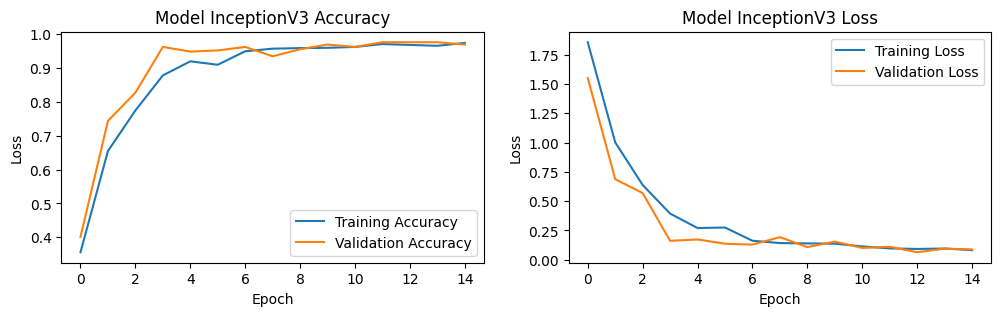

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(train_acc)), train_acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model InceptionV3 Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(range(len(train_loss)), train_loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model InceptionV3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
InceptionV3_x_final_model.save('modell.h5')
loaded_model = tf.keras.models.load_model('modell.h5')


In [ ]:
InceptionV3_x_final_model.save('model.keras')

In [ ]:
model = tf.keras.models.load_model('model.keras')

# model evaluation
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {validation_loss}')
print(f'Validation accuracy: {validation_accuracy}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.9841 - loss: 0.0533
Validation loss: 0.07906188070774078
Validation accuracy: 0.9757785201072693


Saving WhatsApp Image 2024-06-08 at 19.30.22_b43d0ddf.jpg to WhatsApp Image 2024-06-08 at 19.30.22_b43d0ddf.jpg


1/1 [==============================] - 3s 3s/step


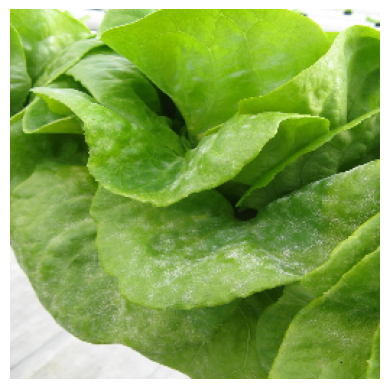

Hasil prediksi untuk gambar: WhatsApp Image 2024-06-08 at 19.30.22_b43d0ddf.jpg
Kelas: Bacterial, Persentase Prediksi: 0.00%
Kelas: Downy Mildew, Persentase Prediksi: 0.00%
Kelas: Healthy, Persentase Prediksi: 0.00%
Kelas: Powdery Mildew, Persentase Prediksi: 100.00%
Kelas: Septoria Blight, Persentase Prediksi: 0.00%
Kelas: Undefine, Persentase Prediksi: 0.00%
Kelas: Viral, Persentase Prediksi: 0.00%
Kelas: Wilt and leaf blight, Persentase Prediksi: 0.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from google.colab import files
from keras.models import load_model

# Upload gambar dari komputer lokal
uploaded = files.upload()

# Path ke model yang telah dilatih
model_path = "/content/model.keras"

# Daftar kelas
class_names = {
    0: 'Bacterial',
    1: 'Downy Mildew',
    2: 'Healthy',
    3: 'Powdery Mildew',
    4: 'Septoria Blight',
    5: 'Undefine',
    6: 'Viral',
    7: 'Wilt and leaf blight'
}

# Memuat model
model = load_model(model_path)
img_height = 256
img_width = 256
# Fungsi untuk memprediksi kelas gambar
def predict_class(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)[0]
    return img, predictions

# Menampilkan hasil prediksi untuk setiap gambar yang diunggah
for filename in uploaded.keys():
    img_path = '/content/' + filename
    img, predictions = predict_class(img_path)

    # Menampilkan gambar
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f'Hasil prediksi untuk gambar: {filename}')
    for i, class_name in class_names.items():
        print(f'Kelas: {class_name}, Persentase Prediksi: {predictions[i] * 100:.2f}%')

# tf.lite

In [ ]:
import tensorflow as tf

model_path = "/content/model.keras"

tflite_model_path = "/content/model.tflite"

model = tf.keras.models.load_model(model_path)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

# tf.js

In [ ]:
!pip install tensorflowjs

In [ ]:
from tensorflow.python.saved_model.save import save
import tensorflowjs

save_dir = os.path.join('/tmp/', 'model.h5')
InceptionV3_x_final_model.save(save_dir)

In [ ]:
!cd /tmp
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /tmp/model.h5 /tmp/tfjs_model

2024-06-13 18:22:09.586662: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!zip -r /tmp/tfjs_model/model.zip /tmp/tfjs_model

  adding: tmp/tfjs_model/ (stored 0%)
  adding: tmp/tfjs_model/group1-shard30of30.bin (deflated 8%)
  adding: tmp/tfjs_model/group1-shard11of30.bin (deflated 7%)
  adding: tmp/tfjs_model/group1-shard6of30.bin (deflated 7%)
  adding: tmp/tfjs_model/group1-shard22of30.bin (deflated 8%)
  adding: tmp/tfjs_model/group1-shard18of30.bin (deflated 7%)
  adding: tmp/tfjs_model/group1-shard23of30.bin (deflated 8%)
  adding: tmp/tfjs_model/group1-shard24of30.bin (deflated 8%)
  adding: tmp/tfjs_model/group1-shard2of30.bin (deflated 7%)
  adding: tmp/tfjs_model/group1-shard8of30.bin (deflated 7%)
  adding: tmp/tfjs_model/group1-shard26of30.bin (deflated 8%)
  adding: tmp/tfjs_model/group1-shard27of30.bin (deflated 8%)
  adding: tmp/tfjs_model/group1-shard17of30.bin (deflated 7%)
  adding: tmp/tfjs_model/group1-shard28of30.bin (deflated 8%)
  adding: tmp/tfjs_model/group1-shard21of30.bin (deflated 7%)
  adding: tmp/tfjs_model/group1-shard20of30.bin (deflated 7%)
  adding: tmp/tfjs_model/group1-sha